El objetivo de este notebook es escoger el mejor modelo de machine learning para este problema.



Preparación de los datos.

In [5]:
#importación de las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [8]:
#cargar el dataframe
df = pd.read_csv('/Users/wilbertpeniche/Desktop/homeCreditKaggle/creditrisk /ultimateDf.csv')

In [12]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,...,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS mobile with interest,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1,0,1,202500.0,406597.5,24700.5,-9461,-637,...,0.0,0.0,0.0,0.0,1038818.0,1.0,19.0,-25.0,9251.775,9251.775
1,100003,0,1,1,0,270000.0,1293502.5,35698.5,-16765,-1188,...,0.0,1.0,1.0,0.0,2636178.0,1.0,12.0,-536.0,25396.335,25396.335
2,100004,0,0,0,1,67500.0,135000.0,6750.0,-19046,-225,...,0.0,0.0,0.0,0.0,1564014.0,1.0,3.0,-724.0,10573.965,10573.965
3,100006,0,1,1,1,135000.0,312682.5,29686.5,-19005,-3039,...,0.0,1.0,1.0,0.0,2299329.0,1.0,10.0,-11.0,29027.520,29027.520
4,100007,0,1,0,1,121500.0,513000.0,21865.5,-19932,-3038,...,1.0,1.0,0.0,1.0,2462742.0,1.0,17.0,-14.0,22678.785,22678.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,0,157500.0,254700.0,27558.0,-9327,-236,...,0.0,0.0,0.0,1.0,2248017.0,1.0,7.0,-30.0,12815.010,12815.010
307507,456252,0,1,1,1,72000.0,269550.0,12001.5,-20775,365243,...,0.0,0.0,0.0,0.0,1503599.0,1.0,6.0,-2316.0,10074.465,10074.465
307508,456253,0,1,1,1,153000.0,677664.0,29979.0,-14966,-7921,...,0.0,0.0,0.0,1.0,2029307.0,1.0,12.0,-1716.0,5575.185,5575.185
307509,456254,1,1,1,1,171000.0,370107.0,20205.0,-11961,-4786,...,0.0,1.0,0.0,1.0,2016407.0,1.0,10.0,-7.0,19065.825,19065.825


In [13]:
#eliminación de las variables KEY
df.drop(['SK_ID_PREV'],axis=1,inplace=True)

In [14]:
df.drop(['SK_ID_CURR'],axis=1,inplace=True)

Balanceo de datos

In [15]:
#submuestreo de los datos
from sklearn.utils import resample

# Dividir los datos en clases mayoritarias y minoritarias
df_majority = df[df['TARGET'] == 0]
df_minority = df[df['TARGET'] == 1]

# Aplicar el submuestreo aleatorio en la clase mayoritaria
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combinar las clases mayoritarias submuestreadas y las minoritarias
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Mezclar el DataFrame resultante
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


Separación de variables

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
#Separación de X y y en diferentes variables

X = df_balanced.drop('TARGET', axis=1)
y = df_balanced['TARGET']


División de datos

In [18]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [19]:
#escala
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [20]:

# Crear un clasificador RandomForest con pesos de clase ajustados
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenar el modelo
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular métricas de rendimiento
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[4830 2618]
 [2761 4686]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      7448
           1       0.64      0.63      0.64      7447

    accuracy                           0.64     14895
   macro avg       0.64      0.64      0.64     14895
weighted avg       0.64      0.64      0.64     14895



DT: 0.403424 (0.010944)
RandomForest: 0.371457 (0.004660)
Bagged: 0.376924 (0.002054)
AdaBoost: 0.363631 (0.003148)
GradientBoost: 0.358797 (0.006258)


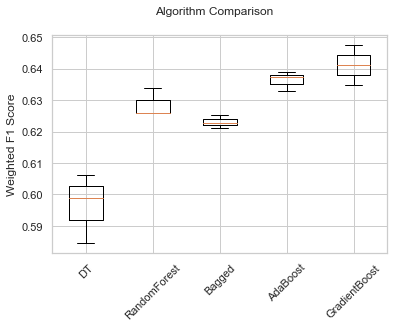

In [27]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import model_selection
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style('whitegrid')


import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)


DT=DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=100,class_weight='balanced', min_samples_leaf=200)
RF=RandomForestClassifier(criterion='gini',random_state = 100,max_depth=100,class_weight='balanced', min_samples_leaf=200,n_estimators=80)
Bagged=BaggingClassifier(n_estimators=100)
AdaBoost=AdaBoostClassifier(n_estimators=100)
GBoost=GradientBoostingClassifier(n_estimators=100)
models = []

models.append(('DT',DT))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoost',AdaBoost))
models.append(('GradientBoost',GBoost))

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_micro')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
sns.set_style('whitegrid')
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation='horizontal')
plt.ylabel('Weighted F1 Score')
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()

In [22]:
final_model = GradientBoostingClassifier(n_estimators=200)
final_model.fit(X_train, y_train)
predicted = final_model.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test, predicted))

Accuracy Score:  0.6527693856998993


In [23]:
print('Classification Report')
print(classification_report(y_test, predicted))

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      7448
           1       0.65      0.67      0.66      7447

    accuracy                           0.65     14895
   macro avg       0.65      0.65      0.65     14895
weighted avg       0.65      0.65      0.65     14895



In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier



In [31]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [34]:
# Crea y entrena el clasificador con los mejores parámetros
best_xgb_clf = XGBClassifier(n_estimators=300, use_label_encoder=False, eval_metric='logloss')
best_xgb_clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de datos de prueba
y_pred = best_xgb_clf.predict(X_test)

# Calcula las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_mat)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.631554212823095
F1 Score: 0.634425792699174
Confusion Matrix: [[4645 2803]
 [2685 4762]]


Al comparar las diferentes variables 